# Polynomial regression

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(font_scale=.75)

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

Vi skapar ett dataset med en ickelinjär relation (notera `X**2` när vi genererar värdena i `y`.)

In [55]:
m = 100

rng = np.random.default_rng(seed=42)

X = (5 * rng.random(m,) - 2)
y = 4 + 3 * X**2 + 5 * X + rng.random(m) * 8  # Nonlinear relationship + noise

$ 4 + 3x^2 + 5x + \epsilon$

In [68]:
X

array([ 1.86978024,  0.1943922 ,  2.2929896 ,  1.48684015, -1.52911326,
        2.87811176,  1.80569851,  1.93032153, -1.35943184,  0.25192969,
       -0.14600988,  2.63382494,  1.2193256 ,  2.11380807,  0.21707099,
       -0.86380639,  0.77292394, -1.68091372,  2.13815586,  1.158322  ,
        1.7904387 , -0.22737016,  2.85349012,  2.46560561,  1.89191749,
       -1.02680646,  0.33360502, -1.78098117, -1.22855254,  1.41524477,
        1.72381078,  2.83754866, -0.37087321, -0.14770147,  0.34777906,
       -1.0526432 , -1.35039247,  0.37852463, -0.86545325,  1.34906997,
        0.18575959,  2.16339098,  1.50132551, -0.43816679,  2.16129901,
        2.02382179, -0.0626081 , -0.55835948,  1.41247752, -1.30123758,
       -1.00045899, -1.96318865,  1.93462189,  1.32425428,  1.52582689,
        1.90364516,  0.29457888,  0.84370598, -1.30101501, -1.42734963,
        1.34201481,  0.35548103,  0.82618053,  1.82499429,  1.1735916 ,
        0.767897  ,  0.7960358 , -0.48024951, -1.84591083,  0.18

<Axes: >

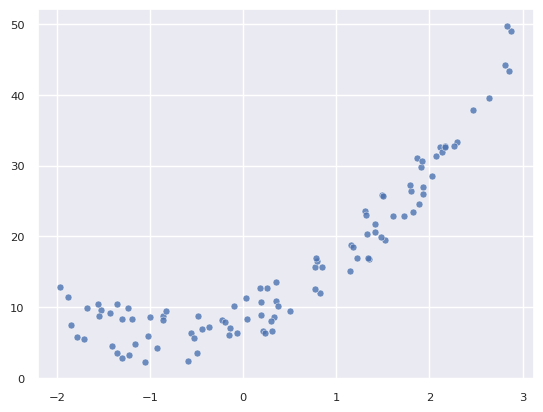

In [57]:
sns.scatterplot(x=X, y=y, alpha=.8, s=25)

### Träna modeller

#### Utan `PolynomialFeatures`

In [71]:
X_reshaped = X.reshape(-1, 1) # Modellen vill ha en (m, n)-matris
m1 = LinearRegression()
m1.fit(X_reshaped, y)

np.float64(0.7209503796134397)

<Axes: >

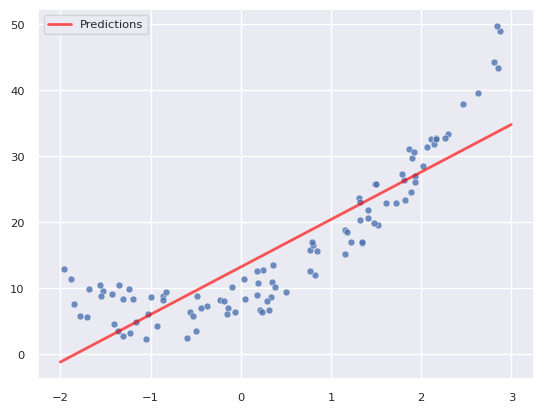

In [59]:
x = np.linspace(-2, 3, m) # Linjär data för att plotta en linje

sns.scatterplot(x=X, y=y, alpha=.8, s=25)
sns.lineplot(x=x, y=m1.predict(x.reshape(-1, 1)), c="red", alpha=.65, lw=2, label="Predictions")

In [72]:
cross_val_score(m1, X_reshaped, y).mean()

np.float64(0.7209503796134397)

In [60]:
m1.intercept_, m1.coef_

(np.float64(13.17404822521922), array([7.20726016]))

$ 13.2 + 7.2x $

#### Med `PolynomialFeatures`

In [61]:
m2 = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
m2.fit(X_reshaped, y)
cross_val_score(m2, X_reshaped, y).mean()

np.float64(0.9448266232237756)

<Axes: >

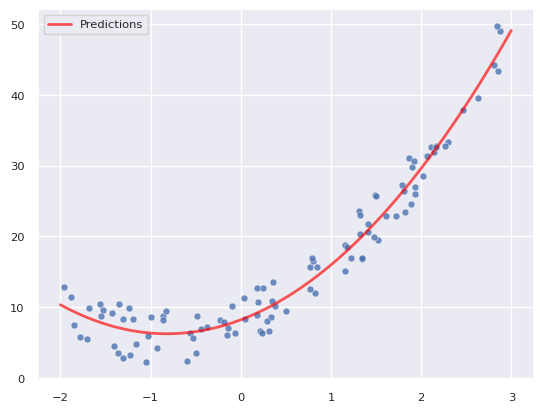

In [62]:
sns.scatterplot(x=X, y=y, alpha=.8, s=25)
sns.lineplot(x=x, y=m2.predict(x.reshape(-1, 1)), c="red", alpha=.65, lw=2, label="Predictions") # type: ignore

`m2` är en pipeline. För att komma åt *estimatorn* använder vi `named_steps`.

In [67]:
m2.named_steps["polynomialfeatures"].n_output_features_

3

In [63]:
m2.named_steps["linearregression"].intercept_, m2.named_steps["linearregression"].coef_

(np.float64(8.210257756977153), array([0.        , 4.81523264, 2.9402351 ]))